In [1]:
from policyengine.countries import UK
from policyengine.utils.reforms import create_reform

PolicyEngineUK = UK()

In [9]:
parse = lambda **params: create_reform(params, PolicyEngineUK.policyengine_parameters)

reform = (
    parse(
        WA_adult_UBI_age=16,
        child_UBI=92,
        adult_UBI=184,
        senior_UBI=184,
    ),
    parse(
        abolish_CB=True,
        abolish_CTC=True,
        abolish_WTC=True,
        abolish_SP=True,
        abolish_PC=True,
        abolish_IS=True,
        abolish_JSA_income=True,
        abolish_UC_standard=True,
        abolish_UC_child=True,
        abolish_UC_carer=True,
    ),
    parse(
        personal_allowance=0,
        higher_threshold=50000,
    ),
    parse(
        basic_rate=0.35,
        higher_rate=0.55,
        add_rate=0.6,
    ),
    parse(
        NI_main_rate=0.1,
        NI_add_rate=0.1,
        NI_class_4_main_rate=0.1,
        NI_class_4_add_rate=0.1,
    ),
)

In [10]:
baseline = PolicyEngineUK.baseline
reformed = PolicyEngineUK._create_reform_sim(reform)

In [11]:
from tqdm import tqdm
import pandas as pd
names = [
    "UBI",
    "Welfare",
    "PA",
    "IT",
    "NI",
]
cumulative_costs = []
for i in tqdm(range(1, len(reform) + 1)):
    cumulative_costs += [(PolicyEngineUK._create_reform_sim(reform[:i]).calc("net_income").sum() - baseline.calc("net_income").sum()) / 1e9]

100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


In [12]:
df = pd.DataFrame(dict(name=names, net_cost=cumulative_costs))
df["difference"] = df.net_cost.values - pd.Series([0] + list(df.net_cost[:-1].values))

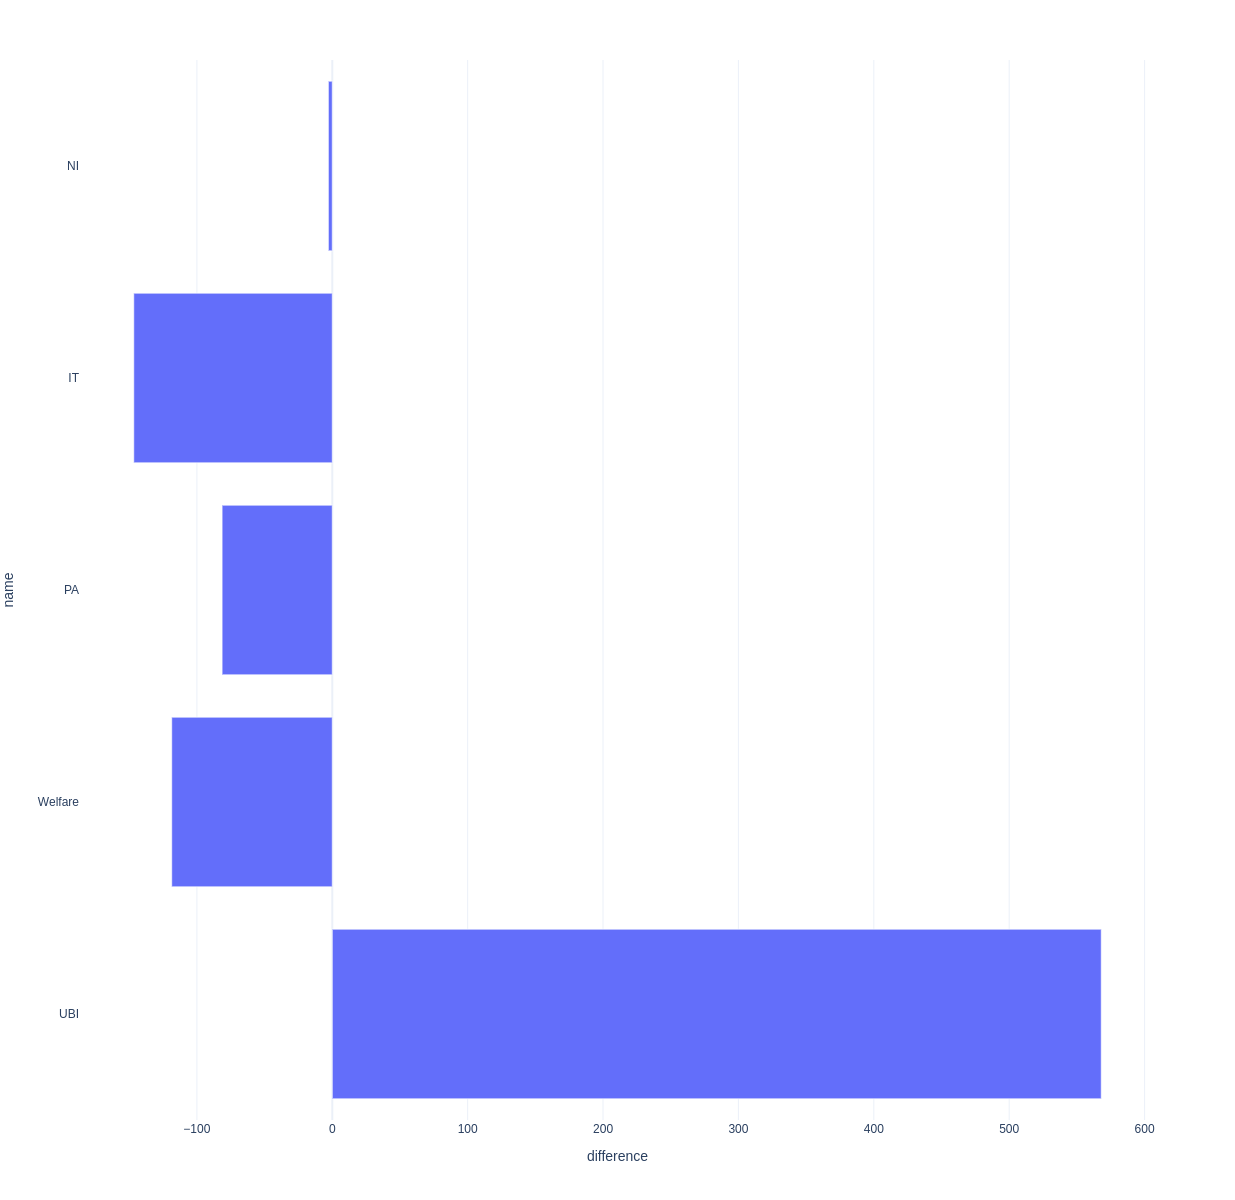

In [13]:
import plotly.express as px

px.bar(df, y="name", x="difference", orientation="h").update_layout(template="plotly_white", width=800, height=1200)